<a href="https://colab.research.google.com/github/cihan53/karakter_frekans/blob/main/Frekans_Analiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**News dan Metin alımı**

In [66]:
import os
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt
import operator
# import string library function 
import string 
import math
from collections import Counter
from os.path import exists

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.2f' % int(height),
                ha='center', va='bottom')
        
def file_get_contents(filename):
  if os.path.exists(filename):
    fp = open(filename, "r")
    content = fp.read()
    fp.close()
    return content

def getLinks(soup):
  links=[];
  _links  = soup.find_all(["a"])
  for link in _links:
    if( link.has_attr("href") and link["href"].startswith("/news/")==True ):
      links.append(url+link["href"] )
  return links 



url="https://bbc.com"
html = urlopen(url+"/news/").read()
soup = BeautifulSoup(html, features="html.parser")
#get all links
newsLinks = getLinks(soup)
     

['https://bbc.com/news/world-60525350', 'https://bbc.com/news/coronavirus', 'https://bbc.com/news/science-environment-56837908', 'https://bbc.com/news/av/10462520', 'https://bbc.com/news/world', 'https://bbc.com/news/world/us_and_canada', 'https://bbc.com/news/uk', 'https://bbc.com/news/business', 'https://bbc.com/news/technology', 'https://bbc.com/news/science_and_environment', 'https://bbc.com/news/stories', 'https://bbc.com/news/entertainment_and_arts', 'https://bbc.com/news/health', 'https://bbc.com/news/in_pictures', 'https://bbc.com/news/reality_check', 'https://bbc.com/news/world_radio_and_tv', 'https://bbc.com/news/newsbeat', 'https://bbc.com/news/the_reporters', 'https://bbc.com/news/world-60525350', 'https://bbc.com/news/coronavirus', 'https://bbc.com/news/coronavirus', 'https://bbc.com/news/have_your_say', 'https://bbc.com/news/science-environment-56837908', 'https://bbc.com/news/av/10462520', 'https://bbc.com/news/world', 'https://bbc.com/news/world', 'https://bbc.com/news/

**Kelime havuzu için haber sayfaları gezilip metinler alınıyor.**

In [12]:
text=""
file_exists = exists('/content/news.txt')
if(not file_exists):
  html=""
  x = np.array(newsLinks)
  newsLinks =np.unique(x);
  cache_link=[]
  
  for link in newsLinks:

    if( len(text)>300000): break

    html = urlopen(link).read()
    soup = BeautifulSoup(html, features="html.parser")
    # kill all script and style elements
    for script in soup(["script", "style"]):
      script.extract()    # rip it out

    #sayfadaki diğer haber linklerini al ve diğer linkler ile birleştir.
    new_links = getLinks(soup) 
    if ( new_links is not None ):
      for  l in new_links  :
        if(not (l in newsLinks)):
          newsLinks = np.append(newsLinks, l)
      


    if( link[-8:].isnumeric()):
      print("Sayfadaki metinleri alınıyor...", link)
      # get text
      tags = soup.find("article")
      if( tags is not None):
        for tag in tags:
          text += re.sub('[^A-za-z]','',tag.get_text().lower() )

  text = text.replace("[",'').replace("]","");
  with open('/content/news.txt', 'w') as writefile:
      writefile.write(text)
else:
  text  = file_get_contents('/content/news.txt')
print("Metin karakter sayısı ", len(text))
print(text)

Metin karakter sayısı  301181
howtoshareyourquestionsstoriespicturesandvideoswithbbcnewspublishedaugustshareclosesharepagecopylinkaboutsharingimagesourcethinkstockeverydaybbcnewsontvonradioandonlinebringsyouthelateststoriesfromacrosstheglobebutwhatwewanttoheararetheissuesthatmattertoyouthepartyouplayinmakingthenewsisveryimportantwhetheritisbreakingnewsorafeatureditemyourcontributioncanmakeadifferencehaveyouseenorbeeninvolvedinanewseventissomethingsignificantbizarreorunusualhappeningwhereyoulivehaveyougotastorytotelloristheresomethingyouthinkweshouldfollowuparetheretopicsyouwanttogettheworldtalkingaboutonwhatdoyouwanttocommentordoyouwanttofindoutwhatothersaretalkingabouttermsofuseforsendingcontributionstothebbcandthebbcsprivacypolicyifyouhaveastorypictureorvideoyouwishtoshareherearethedifferentwaystosendinyourcontributionscontactusontwittercontactusattwittercombbc_haveyoursaywemayuseyourtweetsdisplayingyourtwitterusernameonbbcoutputmessageusviaachatappyoucansendapicturevideoormessagetoo

**Karakter frekans hesaplaması yapılıyor**

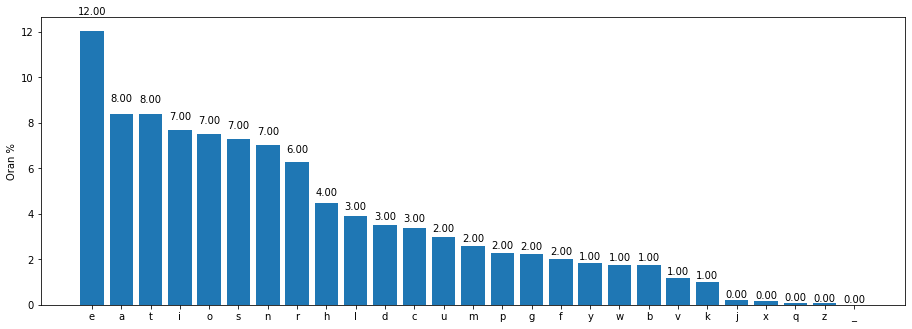

In [123]:
letters = 0
frekans={}
for i, c in enumerate(text):
  if( frekans.__contains__(c)==False) : frekans[c] =1
  else:  
     frekans[c] =frekans[c] +1


frekans = dict( sorted(frekans.items(), key=operator.itemgetter(1),reverse=True))

keys = frekans.keys()
values = frekans.values()
values= list(map(lambda x: x*100/len(text), values))
fig, ax = plt.subplots()
ax = fig.add_axes([0,0,2,1])
rects1 = ax.bar(keys,values)
plt.ylabel('Oran %')

autolabel(rects1)
plt.show()



**Şifrelenmiş Metin Frekans Analizi**

Metin karakter sayısı  784


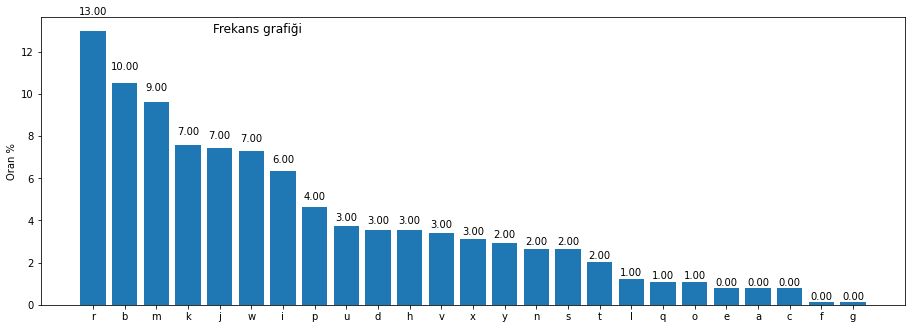

In [124]:
text2 =text3= """lrvmnir bpr sumvbwvr jx bpr lmiwv yjeryrkbi jx qmbm wi bpr xjvni mkd ymibrut jx irhx wi bpr riirkvr jx
ymbinlmtmipw utn qmumbr dj w ipmhh but bj rhnvwdmbr bpr yjeryrkbi jx bpr qmbm mvvjudwko bj
yt wkbrusurbmbwjk lmird jk xjubt trmui jx ibndt
wb wi kjb mk rmit bmiq bj rashmwk rmvp yjeryrkb mkd wbi iwokwxwvmkvr mkd ijyr ynib urymwk
nkrashmwkrd bj ower m vjyshrbr rashmkmbwjk jkr cjnhd pmer bj lr fnmhwxwrd mkd wkiswurd bj
invp mk rabrkb bpmb pr vjnhd urmvp bpr ibmbr jx rkhwopbrkrd ywkd vmsmlhr jx urvjokwgwko
ijnkdhrii ijnkd mkd ipmsrhrii ipmsr w dj kjb drry ytirhx bpr xwkmh mnbpjuwbt lnb yt rasruwrkvr cwbp
qmbm pmi hrxb kj djnlb bpmb bpr xjhhjcwko wi bpr sujsru msshwvmbwjk mkd wkbrusurbmbwjk w
jxxru yt bprjuwri wk bpr pjsr bpmb bpr riirkvr jx jqwkmcmk qmumbr cwhh urymwk wkbmvb
"""
text3 = re.sub('[^A-za-z]','',text3 )
print("Metin karakter sayısı ", len(text2))
pass_frekans={}
for i, c in enumerate(text3):
  if( pass_frekans.__contains__(c)==False) : pass_frekans[c] =1
  else:  
     pass_frekans[c] =pass_frekans[c] +1

pass_frekans = dict( sorted(pass_frekans.items(), key=operator.itemgetter(1),reverse=True))

 


keys = pass_frekans.keys()
values = pass_frekans.values()
values= list(map(lambda x: x*100/len(text3), values))
fig, ax = plt.subplots()
ax = fig.add_axes([0,0,2,1])
rects1 = ax.bar(keys,values)
plt.ylabel('Oran %')
fig.suptitle('Frekans grafiği')

autolabel(rects1)
plt.show()


**Grafik Hazırlama**

<BarContainer object of 25 artists>

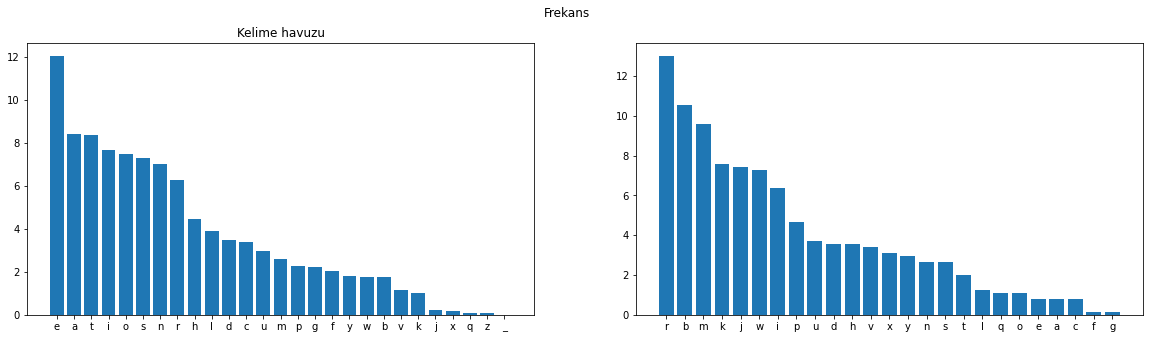

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
fig.suptitle('Frekans')
 
keys = frekans.keys()
values = frekans.values()
values= list(map(lambda x: x*100/len(text), values))

ax1.bar(keys, values)
ax1.set_title('Kelime havuzu')

keys1 = pass_frekans.keys()
values1 = pass_frekans.values()
values1= list(map(lambda x: x*100/len(text3), values1))
ax2.bar(keys1, values1)


 